<center>
    <H1> k-NN CLASSIFIER </H1>
    <br>
=====================================================================================================================
<br>
k Nearest Neighbours algorithm is a type of supervised Machine Learning algorithm. It is extremely easy to implement in its most basic form. k-NN avoids trainig of the model and hence also called 'Lazy Learner'.
</center>

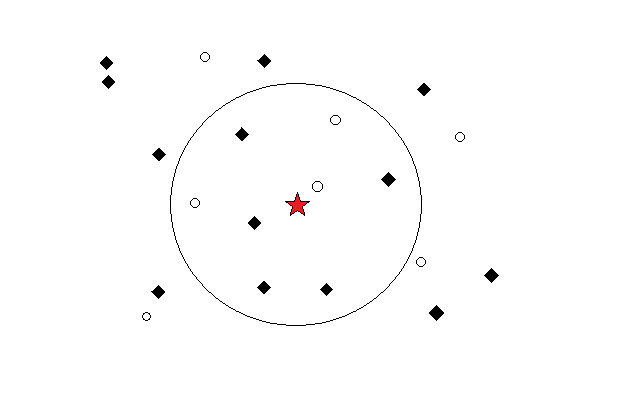

## STEP 1: IMPORT LIBRARIES

In [14]:
import pandas as pd
import numpy as np
#from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
import k_nearest_neighbors as my_k_nearest_neighbors

## STEP 2: LOAD DATASET

In [15]:
dataset = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')   #load dataset from csv
dataset.head()           #show first 5 rows

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.857143,1211,24,63,6,6,0
1,0.250000,313,101,173,48,0,0
2,0.411765,247,51,382,50,4,0
3,0.611111,41,3,36,5,0,0
4,0.600000,12341,770,1417,0,8,1


In [16]:
#Combinig attributes into single list of tuples and using those features create a 2D matrix 

features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)

data = dataset.as_matrix(columns = features)
# data = dataset.values

/home/abhishek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [17]:
print("Total instances : ", data.shape[0], "\nNumber of features : ", data.shape[1])

Total instances :  6945 
Number of features :  6


In [18]:
#convert label column into 1D arrray

label = np.array(dataset['label'])
# label

## STEP 3: TESTING CLASSIFIER 

Using 80-20 split, 20% of the instances will be used for testing. Their labels will be predicted and then compared with the actual labels. 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

In [20]:
print("Number of testing instances: ", X_test.shape[0])

Number of testing instances:  1389


In [21]:
neighbors = 5                    #tested optimal value of k is 5

knn_model = KNeighborsClassifier(n_neighbors = neighbors)

#X_train and y_train are the attributes and labels of insatnces used for prediction
data = X_train
label = y_train

knn_model.fit(data, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knn_model,y_predict = my_k_nearest_neighbors.k_nearest_neighbours(X_train, X_test, y_train, y_test)


In [23]:
'''
   Now, apply the model to the entire test set and predict the label for each test example

'''       
       
y_predict = []                       #To store prediction of each test example

for test_case in range(len(X_test)): 
    label = knn_model.predict([X_test[test_case]])
    
    #append to the predictions list
    y_predict.append(np.asscalar(label))

#predictions

## STEP 4: EVALUATION OF CLASSIFICATION RESULTS

The classifier will be evaluted using Accuracy, Recall, Precision and F-measure. For this first, a confusion matrix will be created. 

In [24]:
'''
    True Negatives is C(0,0) 
    False Negatives is C(1,0)
    False Positives is C(0,1)
    True Positives is C(1,1) 

'''

conf_matrix = confusion_matrix(y_test, y_predict)

In [25]:
#true_negative
TN = conf_matrix[0][0]
#false_negative
FN = conf_matrix[1][0]
#false_positive
FP = conf_matrix[0][1]
#true_positive
TP = conf_matrix[1][1]

In [26]:
# Recall is the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. 
# High Recall indicates the class is correctly recognized (small number of FN)

recall = (TP)/(TP + FN)

In [27]:
# Precision is the the total number of correctly classified positive examples divided by the total number of predicted positive examples. 
# High Precision indicates an example labeled as positive is indeed positive (small number of FP)

precision = (TP)/(TP + FP)

In [28]:
fmeasure = (2*recall*precision)/(recall+precision)
accuracy = (TP + TN)/(TN + FN + FP + TP)

accuracy_score(y_test, y_predict)     #using inbuilt function

0.9575233981281498

In [29]:
print("------ CLASSIFICATION PERFORMANCE OF K-NEAREST-NEIGHBORS MODEL ------ \n"\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )



------ CLASSIFICATION PERFORMANCE OF K-NEAREST-NEIGHBORS MODEL ------ 

 Recall :  96.14285714285714 %
 Precision :  95.46099290780143 %
 Accuracy :  95.75233981281498 %
 F-measure :  95.80071174377224 %


In [30]:
accuracy_list = [[0]*5 for _ in range(max_iterations)]
accuracy_list

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [31]:
print("neighbors\t","recall\t","precision\t","fmeasure\t","accuracy\t")
max_iterations = 10
accuracy_list = [[0]*5 for _ in range(max_iterations)]

for neighbors in range (1,max_iterations+1):
    # Generate the model
    
    knn_model = KNeighborsClassifier(n_neighbors = neighbors)

    # Train the model using the training sets
    data = X_train
    label = y_train

    knn_model.fit(data, label)
    y_predict = []                       #to store prediction of each test example

    for test_case in range(len(X_test)): 
        label = knn_model.predict([X_test[test_case]])

        #append to the predictions list
        y_predict.append(np.asscalar(label))

    #predictions
    conf_matrix = confusion_matrix(y_test, y_predict)
    #true_negative
    TN = conf_matrix[0][0]
    #false_negative
    FN = conf_matrix[1][0]
    #false_positive
    FP = conf_matrix[0][1]
    #true_positive
    TP = conf_matrix[1][1]

    recall = (TP)/(TP + FN)

    precision = (TP)/(TP + FP)

    fmeasure = (2*recall*precision)/(recall+precision)

    accuracy = (TP + TN)/(TN + FN + FP + TP)
    print(neighbors,"\t",recall,"\t",precision,"\t",fmeasure,"\t",accuracy)
    accuracy_list[neighbors-1][0] = neighbors
    accuracy_list[neighbors-1][1] = recall*100
    accuracy_list[neighbors-1][2] = precision*100
    accuracy_list[neighbors-1][3] = fmeasure*100
    accuracy_list[neighbors-1][4] = accuracy*100


neighbors	 recall	 precision	 fmeasure	 accuracy	
1 	 0.9657142857142857 	 0.9534555712270804 	 0.9595457771469128 	 0.958963282937365
2 	 0.9414285714285714 	 0.9791976225854383 	 0.9599417334304442 	 0.9604031677465803
3 	 0.9585714285714285 	 0.9585714285714285 	 0.9585714285714285 	 0.9582433405327574
4 	 0.9471428571428572 	 0.9664723032069971 	 0.9567099567099566 	 0.9568034557235421
5 	 0.9614285714285714 	 0.9546099290780142 	 0.9580071174377224 	 0.9575233981281498
6 	 0.9485714285714286 	 0.9665211062590975 	 0.9574621485219899 	 0.9575233981281498
7 	 0.9571428571428572 	 0.9571428571428572 	 0.9571428571428572 	 0.9568034557235421
8 	 0.9471428571428572 	 0.9650655021834061 	 0.9560201874549388 	 0.9560835133189345
9 	 0.9528571428571428 	 0.9597122302158273 	 0.9562724014336916 	 0.9560835133189345
10 	 0.9457142857142857 	 0.9650145772594753 	 0.9552669552669553 	 0.9553635709143269


In [32]:
print("neighbours\t","recall\t","\tprecision\t","\tfmeasure\t","\taccuracy\t")
for i in range(len(accuracy_list)):
    print(accuracy_list[i][0]," ",accuracy_list[i][1]," ",accuracy_list[i][2]," ",accuracy_list[i][3]," ",accuracy_list[i][3])

neighbours	 recall	 	precision	 	fmeasure	 	accuracy	
1   96.57142857142857   95.34555712270803   95.95457771469128   95.95457771469128
2   94.14285714285714   97.91976225854383   95.99417334304442   95.99417334304442
3   95.85714285714285   95.85714285714285   95.85714285714285   95.85714285714285
4   94.71428571428572   96.6472303206997   95.67099567099567   95.67099567099567
5   96.14285714285714   95.46099290780143   95.80071174377224   95.80071174377224
6   94.85714285714286   96.65211062590974   95.74621485219899   95.74621485219899
7   95.71428571428572   95.71428571428572   95.71428571428572   95.71428571428572
8   94.71428571428572   96.50655021834062   95.60201874549388   95.60201874549388
9   95.28571428571428   95.97122302158273   95.62724014336916   95.62724014336916
10   94.57142857142857   96.50145772594753   95.52669552669553   95.52669552669553


In [33]:
print(tabulate(accuracy_list))

NameError: name 'tabulate' is not defined